# Import Data and package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn import tree
import seaborn as sns
import csv

from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import string

In [2]:
train = '/home/fajrin/ML_29/Classifier/LogisticRegression_titanic/train.csv'
test = '/home/fajrin/ML_29/Classifier/LogisticRegression_titanic/test.csv'

In [3]:
df= pd.read_csv(train)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2 Data Quality 

In [5]:
# check missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.1 AGE

In [6]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [7]:
print('percentage of missing value in Age column is %.3f%%'
      %(df.Age.isnull().sum()/df.Age.shape[0] *100))

percentage of missing value in Age column is 19.865%


/home/fajrin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/fajrin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/fajrin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/fajrin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


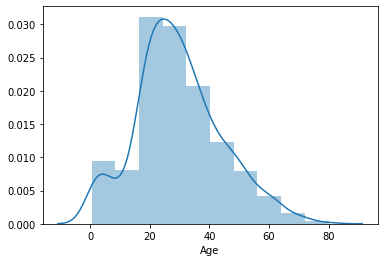

In [8]:
sns.distplot(df.Age, bins = 10)

In [9]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### 2.2 Cabin - Missing Values

In [10]:
print('the percentage missing values in cabin is %.2f%%' %(df.Cabin.isnull().sum()/df.Cabin.shape[0] *100)) 

the percentage missing values in cabin is 77.10%


In [11]:
df.Cabin.isnull().sum()

687

### 2.3 Embarked

In [12]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
print('the percentage missing values in cabin is %.2f%%' %(df.Embarked.isnull().sum()/df.Embarked.shape[0] *100)) 

the percentage missing values in cabin is 0.22%


In [14]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

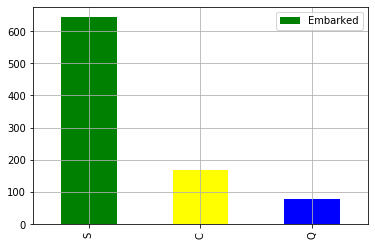

In [15]:
df.Embarked.value_counts().plot(kind='bar' , color =['green','yellow','blue'])
plt.legend()
plt.grid()

# 3.Feature Engineering

### Title name
- in this parameters I try to split the Title name of passenger to make easy classifier when I want to categorize the passenger status based on theri title 

In [16]:
df['Title'] = df.Name.str.replace('(.*,)|(\\..*)' ,'')


In [17]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [18]:
df.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Lady              1
 the Countess      1
 Mme               1
 Sir               1
 Capt              1
 Jonkheer          1
 Ms                1
 Don               1
Name: Title, dtype: int64

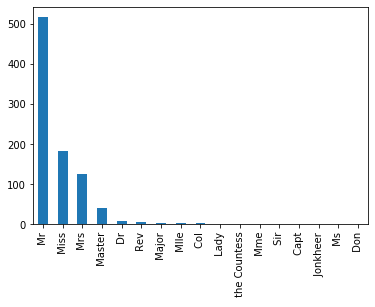

In [19]:
df.Title.value_counts().plot(kind='bar')

In [20]:
# modify categorical title 
df.Title.unique()
others = [' Master', ' Don', ' Rev', ' Dr', ' Mme' ,' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer',' Major']
miss = [' Miss',' Ms' ,' Lady']
mr = [' Mr',' Sir']
df.Title= df.Title.apply(lambda x:' Others' if x in others else (' Miss' if x in miss else(' Mr' if x in mr else x))  )


In [21]:
df.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Others'], dtype=object)

###  Age

In [22]:
df[df['Age'].isnull()].Title.value_counts()

 Mr        119
 Miss       36
 Mrs        17
 Others      5
Name: Title, dtype: int64

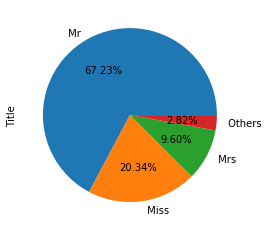

In [23]:
df[df['Age'].isnull()].Title.value_counts().plot(kind='pie' , autopct='%.2f%%')

#### filling missing value

- as reference before I got before , I try to assume that the missing value of age can be filled by median age based on the title status , so I try to make easy categorical side

Text(0.5, 0, 'Age of passengers')

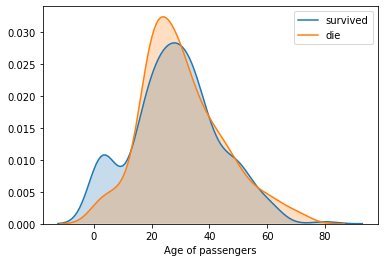

In [24]:
ax = sns.kdeplot( df['Age'][df.Survived==1] ,shade= True , label ='survived') 
sns.kdeplot( df['Age'][df.Survived==0] ,shade= True , label = 'die')
plt.xlabel('Age of passengers')


In [25]:
#mr_age = df[df.Title=='Mr.'].Age.median()
#df.loc[df.Title=='Mr.','Age']=df.Age.fillna(mr_age)

In [26]:
#miss_age = df[df.Title=='Miss.'].Age.median()
#df.loc[df.Title=='Miss.','Age']=df.Age.fillna(miss_age)

In [27]:
def fill_age (df):
    names = df[df['Age'].isnull()].Title.unique().tolist()
    for name in names :
        name_ = df[df.Title==name].Age.median()
        df.loc[df.Title==name,'Age']=df.Age.fillna(name_)

fill_age(df)

### Modify Sex

In [28]:
df['Male'] = df.Sex.apply(lambda x : 1 if x=='male' else 0)

### Alone

In [29]:
status = df.SibSp + df.Parch
df['Alone']= [1 if i == 0 else 0 for i in status ]

### Embarked

In [30]:
df.loc[df.Cabin=='B28' , 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

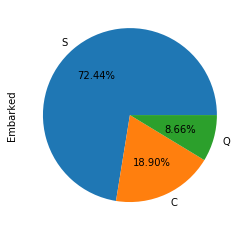

In [31]:
df.Embarked.value_counts().plot(kind='pie' , autopct = '%.2f%%')

In [32]:
# for this Nan value I assume that it's belong to embarked category S
df.Embarked.fillna(value='S')


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [33]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Male,Alone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,0,1


In [34]:
df.Embarked.fillna(value='S' , inplace = True)

### Cabin Category and side
- actually I can't recognice the meaningfull of cabin number on cruise, so I deciced to modify the feature with recognize the cabin category based on The first letter of the cabin number and divided them in to two position based on their even or odd last number

In [35]:
def cabin_modify(df):
    odd = list(str(np.arange(1,9,2)))
    even = list(str(np.arange(0,9,2)))
    df['CCabin']='unknown'
    df['Cabinside']='unknown'
    df.loc[df.Cabin.notnull() ,'CCabin']= df.Cabin.str[0]
    df.loc[df.Cabin.notnull() & df.Cabin.str[-1].isin(odd) , 'Cabinside']= 'left'
    df.loc[df.Cabin.notnull() & df.Cabin.str[-1].isin(even) , 'Cabinside']= 'right'


In [36]:
cabin_modify(df)

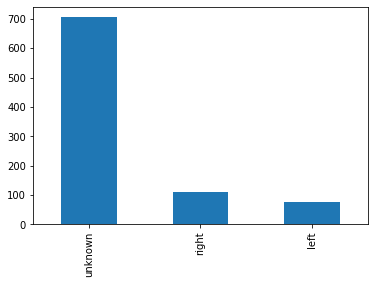

In [37]:
df.Cabinside.value_counts().plot(kind='bar')

In [38]:
df['Familysize'] = df['SibSp'] + df['Parch'] + 1

In [39]:
data= df.copy()

# Train model

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Male,Alone,CCabin,Cabinside,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,unknown,unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,C,left,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,unknown,unknown,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,C,left,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,unknown,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1,1,unknown,unknown,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,1,B,right,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,0,0,unknown,unknown,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,C,right,1


In [41]:
# the columns should be drop 
col_drop = ['Name' ,'Sex', 'Ticket','Cabin']
data.drop (labels = col_drop , axis=1 , inplace = True)

In [42]:
le = LabelEncoder()

In [43]:
data['CCabin'] = le.fit_transform(data['CCabin'])
data['Cabinside'] = le.fit_transform(data['Cabinside'])
data['Title']=le.fit_transform(data['Title'])
data['Embarked'] = le.fit_transform(data['Embarked'])


In [44]:
ohe = OneHotEncoder()

In [45]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Male,Alone,CCabin,Cabinside,Familysize
0,1,0,3,22.0,1,0,7.2500,2,1,1,0,8,2,2
1,2,1,1,38.0,1,0,71.2833,0,2,0,0,2,0,2
2,3,1,3,26.0,0,0,7.9250,2,0,0,1,8,2,1
3,4,1,1,35.0,1,0,53.1000,2,2,0,0,2,0,2
4,5,0,3,35.0,0,0,8.0500,2,1,1,1,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,2,3,1,1,8,2,1
887,888,1,1,19.0,0,0,30.0000,2,0,0,1,1,1,1
888,889,0,3,21.0,1,2,23.4500,2,0,0,0,8,2,4
889,890,1,1,26.0,0,0,30.0000,0,1,1,1,2,1,1


In [46]:
y = data['Survived']
x = data.drop('Survived' , axis =1)

In [47]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size =0.33 , 
                                                       random_state = 42)

In [48]:
log = LogisticRegression()

In [49]:
log.fit(X_train, y_train)

/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
log.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0])

In [51]:
y_pred = log.predict(X_test)

In [52]:
log.score(X_train ,y_train)

0.825503355704698

In [53]:
log.score(X_test, y_test)

0.7932203389830509

In [54]:
data1 = df.copy()

In [55]:
data1.drop(labels=['Name' , 'Ticket','Cabin'], axis =1 , inplace =True)

In [56]:
data1.set_index ('PassengerId' , inplace = True)

In [57]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Male,Alone,CCabin,Cabinside,Familysize
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,1,0,unknown,unknown,2
2,1,1,female,38.0,1,0,71.2833,C,Mrs,0,0,C,left,2
3,1,3,female,26.0,0,0,7.9250,S,Miss,0,1,unknown,unknown,1
4,1,1,female,35.0,1,0,53.1000,S,Mrs,0,0,C,left,2
5,0,3,male,35.0,0,0,8.0500,S,Mr,1,1,unknown,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Others,1,1,unknown,unknown,1
888,1,1,female,19.0,0,0,30.0000,S,Miss,0,1,B,right,1
889,0,3,female,21.0,1,2,23.4500,S,Miss,0,0,unknown,unknown,4


In [58]:
y_data1 = data1['Survived'].values

In [59]:
data1.drop(labels='Survived' ,axis =1 , inplace = True)

In [60]:
x_data1 = ohe.fit_transform (data1[['Sex' ,'Embarked' ,'CCabin' ,'Cabinside']]).toarray()

In [61]:
x_data1.shape

(891, 17)

In [62]:
log.fit(x_data1, y_data1)

/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
log.score(x_data1,y_data1)

0.792368125701459

In [64]:
dft = data.copy()

In [65]:

def impurg (df):
    global mislabeling_survived 
    survived_prob =sum(df['Survived']==1) / df.Survived.shape[0]
    nonsurvived_prob = 1 - survived_prob
    random_survived = survived_prob
    random_nonsurvived = nonsurvived_prob
    
    mislabeling_survived = survived_prob * random_nonsurvived
    mislabeling_nonsurvived=nonsurvived_prob * random_survived
    gini_impurity = mislabeling_survived+mislabeling_nonsurvived
    return gini_impurity

In [66]:
impurg(dft)

0.47301295786144265

In [67]:
survived_prob =sum(df['Survived']==1) / df.Survived.shape[0]
nonsurvived_prob = (1 - survived_prob)

In [68]:
nonsurvived_prob

0.6161616161616161

# Decision Tree

In [69]:
dft
x_tree = dft.drop('Survived' , axis =1).values
y_tree = dft['Survived']

In [70]:
X_train , x_test , y_train , y_test = train_test_split(x_tree , y_tree ,test_size=0.3 , random_state=42)

In [71]:
dct = tree.DecisionTreeClassifier(max_depth =3)

In [72]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
dct.score(X_train , y_train)

0.8314606741573034

In [75]:
train_data = dft.drop('Survived' ,axis=1)

In [76]:
train_data['Prediction_survived']= dct.predict(x_tree)

In [79]:
train_data.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Male,Alone,CCabin,Cabinside,Familysize,Prediction_survived
0,1,3,22.0,1,0,7.2500,2,1,1,0,8,2,2,0
1,2,1,38.0,1,0,71.2833,0,2,0,0,2,0,2,1
2,3,3,26.0,0,0,7.9250,2,0,0,1,8,2,1,1
3,4,1,35.0,1,0,53.1000,2,2,0,0,2,0,2,1
4,5,3,35.0,0,0,8.0500,2,1,1,1,8,2,1,0


In [80]:
dft.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Male,Alone,CCabin,Cabinside,Familysize
0,1,0,3,22.0,1,0,7.2500,2,1,1,0,8,2,2
1,2,1,1,38.0,1,0,71.2833,0,2,0,0,2,0,2
2,3,1,3,26.0,0,0,7.9250,2,0,0,1,8,2,1
3,4,1,1,35.0,1,0,53.1000,2,2,0,0,2,0,2
4,5,0,3,35.0,0,0,8.0500,2,1,1,1,8,2,1
